# Plot creation for the array paper

for tweaking plot layout,colors,etc for simulation data that has already been generated

In [3]:
from matplotlib import colors
import matplotlib.pyplot as plt

## local imports
import os,sys
sys.path.append(os.path.join("..","."))
from field_funcs import * # my helper functions
from simfuncs import * # for saving/retreiving data
from numpy.random import random as rand
from numpy import *
import matplotlib.font_manager as font_manager

## make the display wide
from IPython.core.display import HTML, display, Image
display(HTML("<style>.container{width:100% !important;}</style>"))

# image path 
imagedir = os.path.join('.','paper_data')
print("images saved in", imagedir)

# for matplotlib labels
fontsize=14

def savefigure(fname):
    assert len(fname.split(".")), "fname should have exactly one period '.', before the extension"
    fname = fname.split('.')
    fname = fname[0] + '_' +str(int(10000*rand())) + '.' + fname[1]
    filepath = os.path.join(imagedir,fname)
    plt.savefig(filepath, bbox_inches='tight')
    print("saved file to",filepath)
    
plt.rcParams['font.size'] = '14'

images saved in .\paper_data


In [209]:
flie="myname.someext"
flie = flie.split('.')
flie = flie[0] + '_' +str(int(10000*rand())) + '.' + flie[1]
flie

'myname_1092.someext'

In [206]:
int(10000*rand())

923

## Airy Gauss beam

In [218]:
data = soln_from_csv(fname=os.path.join(imagedir,'airygauss.csv'),labels=False,datatype=float)

saved file to .\paper_data\airygauss_gaussian_compare_4911.svg


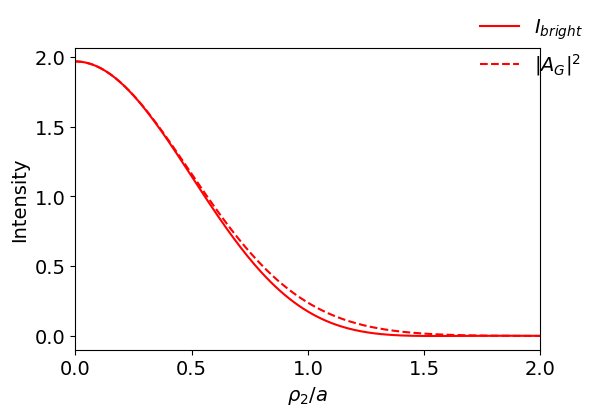

In [219]:
fig, ax = plt.subplots()
fig.dpi=100
color='red'
# labels = ['$|E_{AG}|^2$','$|E_G|^2$']
labels = ['$I_{bright}$','$|A_G|^2$']

# for side in ['top','right']:
#     ax.spines[side].set_visible(False)
ax.plot(data[1],data[0],color=color,label=labels[0])
ax.set_xlim((0,2))
ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
ax.plot(data[1],ypts, color=color,linestyle='--',label=labels[1])
ax.set_xlabel(r'$\rho_2/a$')
ax.set_ylabel('Intensity')
# ax.legend(loc=9)

w0 = 0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

# ax.plot(,e_g(zpts/1e6)**2,color=colors[1],linestyle='--')
# ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[0],linestyle='--')
fig.legend(frameon=False)
savefigure('airygauss_gaussian_compare.svg')

saved file to .\paper_data\airygauss_gaussian_compare_zoomed_6292.svg


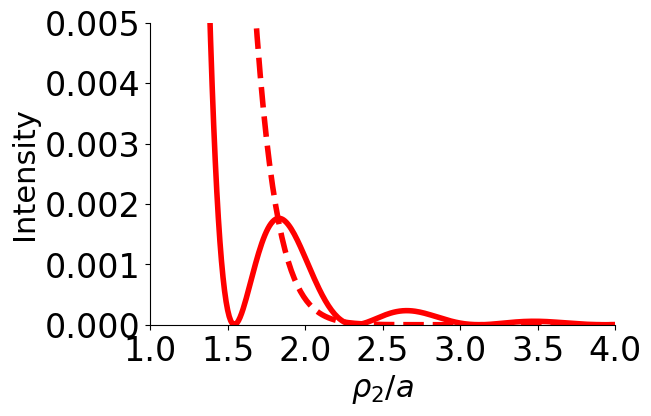

In [67]:
fig, ax = plt.subplots()
fig.dpi=100
color='red'

for side in ['top','right']:
    ax.spines[side].set_visible(False)
ax.plot(data[1],data[0],label="Airy-Gauss",color=color,lw=4)

ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
ax.plot(data[1],ypts,label="Gaussian", color=color,lw=4,linestyle='--')
ax.set_xlabel(r'$\rho_2/a$',fontsize=22)
ax.set_ylabel('Intensity',fontsize=22)
ax.set_ylim((0,0.005))
ax.set_xlim((1,4))

plt.xticks(fontsize=24)

plt.yticks(fontsize=24)


# ax.legend(loc=9)

savefigure('airygauss_gaussian_compare_zoomed.svg')

## xy intensity plots

### data from before the aperture reflectivity bug in my code was fixed

In [73]:
## retreive files

# this data may have been generated prior to when the aperture reflectivity bug in my code was fixed.
files = [os.path.join(imagedir,f) for f in
         ['bright_input_1625939485.csv',
          'bright_focus_1625939485.csv',
          'bright_talbot_1625939490.csv',
          'bright_phases_input_1625939498.csv',
          'bright_phases_focus_1625939499.csv',
          'bright_phases_talbot_1625939503.csv',
          'bright_pos_input_1625939512.csv',
          'bright_pos_focus_1625939512.csv',
          'bright_pos_talbot_1625939516.csv',
          'bright_asym_input_1625939524.csv',
          'bright_asym_focus_1625939525.csv',
          'bright_asym_talbot_1625939529.csv',
          'dark_input_1625939539.csv',
          'dark_focus_1625939540.csv',
          'dark_talbot_1625939544.csv',
          'dark_pos_input_1625939552.csv',
          'dark_pos_focus_1625939553.csv',
          'dark_pos_talbot_1625939557.csv',
          'dark_asym_input_1625939565.csv',
          'dark_asym_focus_1625939566.csv',
          'dark_asym_talbot_1625939569.csv',
          'bright_dark_input_1625939581.csv',
          'bright_dark_focus_1625939583.csv',
          'bright_dark_talbot_1625939587.csv'
         ]]

focals = [files[i] for i in range(len(files)) if not (i+2) % 3]
focals += ['.\paper_data\spatial_spectral_incoh_focus_1625945900.csv']

talbots = [files[i] for i in range(len(files)) if not (i+1) % 3]

bright_talbots = talbots[:4]
dark_talbots = talbots[4:-1]
dark_talbots += ['.\paper_data\spatial_spectral_incoh_talbot_1625945902.csv']
talbots += ['.\paper_data\spatial_spectral_incoh_talbot_1625945902.csv']

In [67]:
focals

['.\\paper_data\\bright_focus_1625939485.csv',
 '.\\paper_data\\bright_phases_focus_1625939499.csv',
 '.\\paper_data\\bright_pos_focus_1625939512.csv',
 '.\\paper_data\\bright_asym_focus_1625939525.csv',
 '.\\paper_data\\dark_focus_1625939540.csv',
 '.\\paper_data\\dark_pos_focus_1625939553.csv',
 '.\\paper_data\\dark_asym_focus_1625939566.csv',
 '.\\paper_data\\bright_dark_focus_1625939583.csv',
 '.\\paper_data\\spatial_spectral_incoh_focus_1625945900.csv']

In [74]:
bright_talbots, dark_talbots

(['.\\paper_data\\bright_talbot_1625939490.csv',
  '.\\paper_data\\bright_phases_talbot_1625939503.csv',
  '.\\paper_data\\bright_pos_talbot_1625939516.csv',
  '.\\paper_data\\bright_asym_talbot_1625939529.csv'],
 ['.\\paper_data\\dark_talbot_1625939544.csv',
  '.\\paper_data\\dark_pos_talbot_1625939557.csv',
  '.\\paper_data\\dark_asym_talbot_1625939569.csv',
  '.\\paper_data\\spatial_spectral_incoh_talbot_1625945902.csv'])

saved file to .\paper_data\xyplot_cmap_inferno_bright_focus_1625939485.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_phases_focus_1625939499.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_pos_focus_1625939512.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_asym_focus_1625939525.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_focus_1625939540.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_pos_focus_1625939553.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_asym_focus_1625939566.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_dark_focus_1625939583.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_spatial_spectral_incoh_focus_1625945900.csv.png


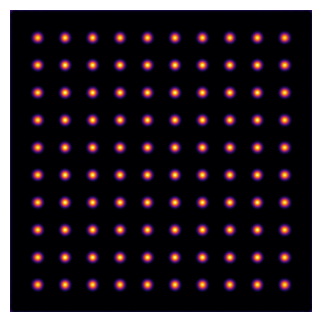

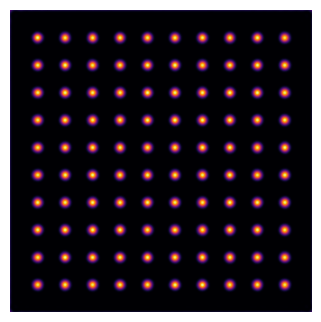

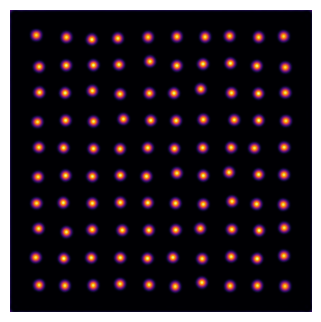

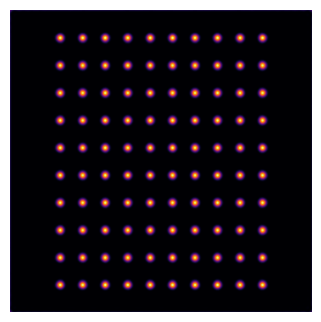

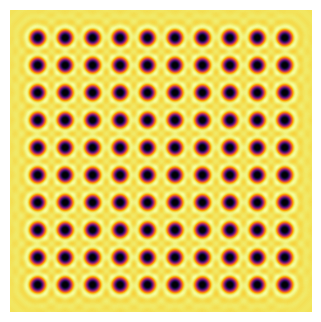

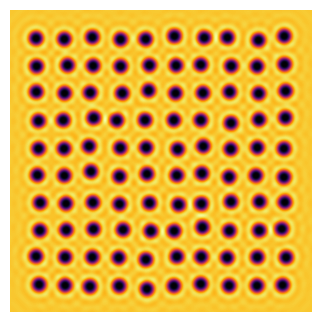

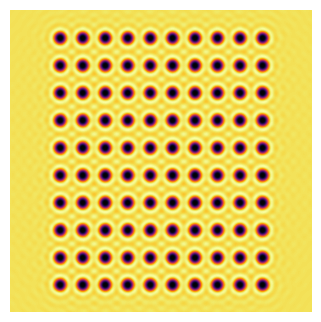

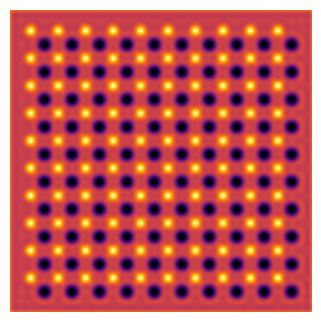

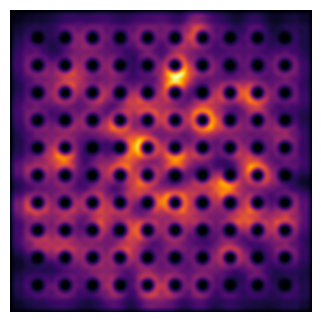

In [70]:
colormap = 'inferno'

focal_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in focals
              ]

for datatuple,fsuffix in zip(focal_data,focals):
    data,_ = datatuple
    fig,ax = figax()
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
    cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()

    savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

saved file to .\paper_data\xyplot_cmap_inferno_bright_talbot_1625939490.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_phases_talbot_1625939503.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_pos_talbot_1625939516.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_asym_talbot_1625939529.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_talbot_1625939544.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_pos_talbot_1625939557.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_dark_asym_talbot_1625939569.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_bright_dark_talbot_1625939587.csv.png
saved file to .\paper_data\xyplot_cmap_inferno_spatial_spectral_incoh_talbot_1625945902.csv.png


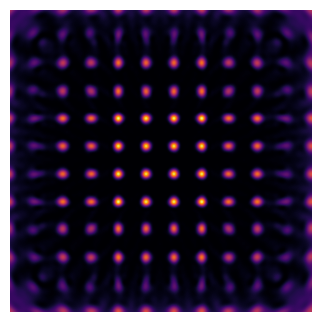

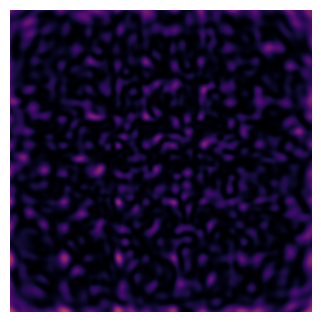

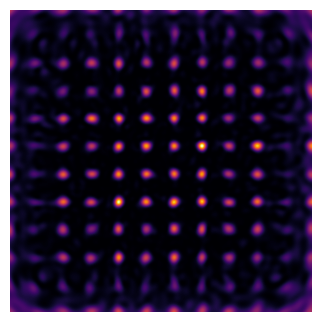

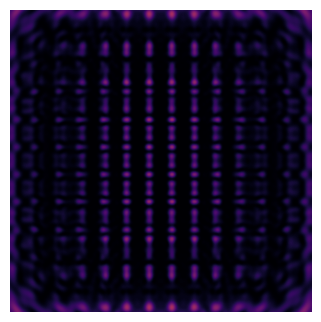

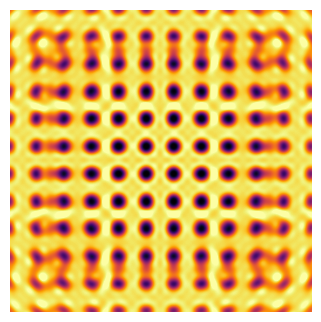

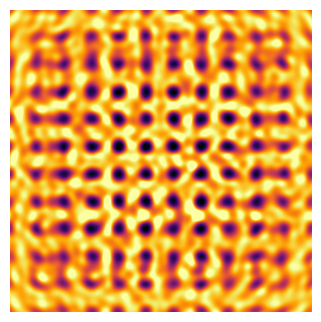

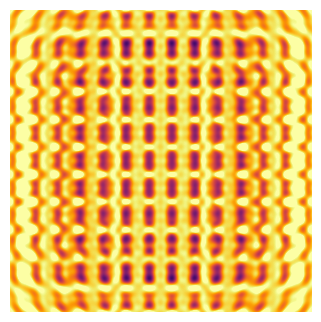

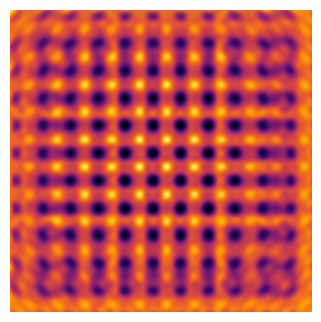

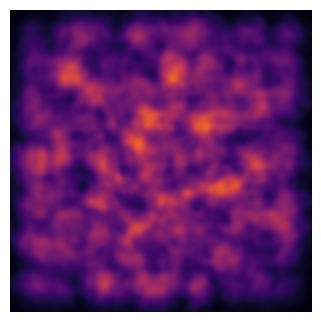

In [75]:
colormap = 'inferno'

talbot_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in talbots
              ]

for datatuple,fsuffix in zip(talbot_data,talbots):
    data,_ = datatuple
    fig,ax = figax()
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
    cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()

    savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

### simulation - talbot compare with coherent and incoherent fields

In [77]:
# the data 
files = [os.path.join(imagedir,f) for f in 
    ['dark_focus_1646239817.csv','dark_talbot_1646239821.csv','spatial_spectral_incoh_focus_1646239310.csv',
     'spatial_spectral_incoh_talbot_1646239315.csv']]
data_tuple = [soln_from_csv(t,labels=False,metastr=True,datatype=float) for t in files]

saved file to .\paper_data\dark_focus_4499.svg
saved file to .\paper_data\dark_talbot_7536.svg
saved file to .\paper_data\incoh_focus_8595.svg
saved file to .\paper_data\incoh_talbot_9816.svg


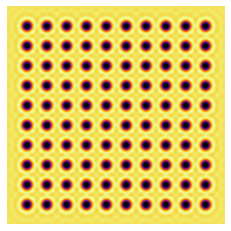

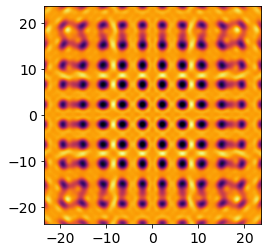

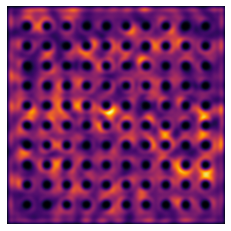

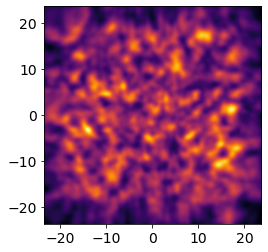

In [88]:
axon = [False,True,False,True]
names = ['dark_focus.svg','dark_talbot.svg','incoh_focus.svg','incoh_talbot.svg']
for aon,tup,nam in zip(axon,data_tuple,names):
    data,_ = tup
    fig,ax = plt.subplots()
    ax.imshow(data,cmap='inferno',extent=[-23.62635000000048,23.62635000000048,-23.62635000000048,23.62635000000048])
    if not aon:
        ax.set_axis_off()
    savefigure(nam)

saved file to .\paper_data\talbot_compare_8235.svg


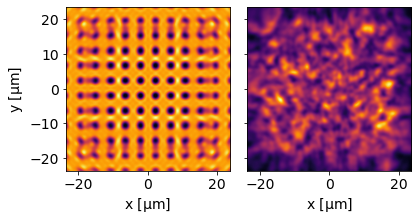

In [100]:
# axon = [False,True,False,True]
datas = (data_tuple[1],data_tuple[3])
fig,axes = plt.subplots(ncols=2,sharey=True)
for ax,data in zip(axes,datas):
    d,_ = data
    ax.imshow(d,cmap='inferno',extent=[-23.62635000000048,23.62635000000048,-23.62635000000048,23.62635000000048])
    ax.set_xlabel(r'x [$\mathrm{\mu m}$]',fontsize=fnt)
axes[0].set_ylabel(r'y [$\mathrm{\mu m}$]',fontsize=fnt)
fig.tight_layout(pad=1)
savefigure('talbot_compare.svg')

saved file to .\paper_data\talbot_compare_slice_7851.svg


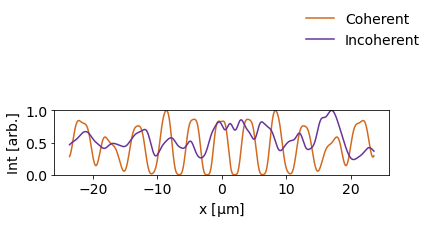

In [141]:
# axon = [False,True,False,True]
datas = (data_tuple[1],data_tuple[3])
labels = ['Coherent','Incoherent']
fig,ax = plt.subplots()
xpts = linspace(-23.62635000000048,23.62635000000048,1000)
colors = ['chocolate','rebeccapurple']
for data,l,col in zip(datas,labels,colors):
    d,_ = data
    d = array(d)
#     for i in range(6):
#         ax.plot(d[d.shape[0]//2-45+i,:],label=i)
    xslice = d[d.shape[0]//2-47,:]
    ax.plot(xpts,xslice/max(xslice),label=l,color=col)
#     ax.imshow(d,cmap='inferno',extent=[-23.62635000000048,23.62635000000048,-23.62635000000048,23.62635000000048])
ax.set_xlabel(r'x [$\mathrm{\mu m}$]',fontsize=fnt)
ax.set_ylabel(r'Int [arb.]',fontsize=fnt)
ax.set_ylim((0,1))
fig.legend(loc='upper right',frameon=False)
ax.set_aspect(10)
savefigure('talbot_compare_slice.svg')

In [94]:
[ax for ax in axes]

[<AxesSubplot:>, <AxesSubplot:>]

In [91]:
type(axes)

numpy.ndarray

In [81]:
for aon,tup in zip(axon,data_tuple):
    print(aon)

False
True
False
True


### experimental data vs simulation

In [180]:
data = os.path.join(imagedir,'site_zstep1.csv')
sim = os.path.join(imagedir,'dark_focus_1645832499.csv')

In [184]:
colormap = 'inferno'
xy_data = soln_from_csv(data,labels=False,metastr=False,datatype=float)
xy_data = array(xy_data)

# compare to numerical simulation
xy_sim,meta =  soln_from_csv(sim,labels=True,metastr=True,datatype=float)
xy_sim = array(xy_sim)

saved file to .\paper_data\xy_data_inferno_no_axes_and_no_cbar_3129.svg


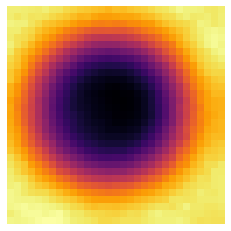

In [187]:
fig,ax = plt.subplots()
cax=ax.imshow(xy_data/amax(xy_data),cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
# ax.set_aspect(0.025)
ax.set_axis_off()
# savefigure('xy_data_inferno_no_axes_and_no_cbar.svg')

saved file to .\paper_data\xy_sim_inferno_no_axes_and_no_cbar_8715.svg


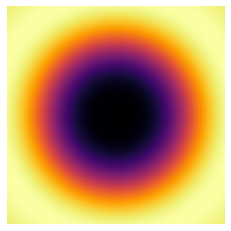

In [195]:
fig,ax = plt.subplots()
trim = 250
cax=ax.imshow((xy_sim/amax(xy_sim))[trim:-trim,trim:-trim],cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
# ax.set_aspect(0.025)
ax.set_axis_off()
savefigure('xy_sim_inferno_no_axes_and_no_cbar.svg')

saved file to .\paper_data\colorbar_7951.svg


C:\Users\prest\AppData\Local\Temp/ipykernel_20472/273441339.py:3: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  cax=ax.imshow([[]],cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])


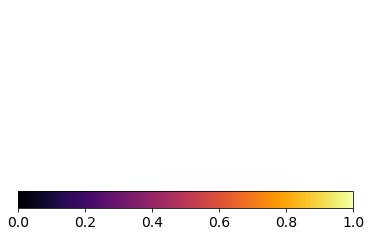

In [199]:
fig,ax = plt.subplots()
# trim = 250
cax=ax.imshow([[]],cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
cax.set_norm(colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax,orientation="horizontal")
# ax.set_aspect(0.025)
ax.set_axis_off()
savefigure('colorbar.svg')

## xz intensity plots
includes line profile in both xz AND xy

TODO: run the simulation again, but 

### experimental data vs simulation

In [175]:
data = os.path.join(imagedir,'multimode_trap_yz_reconstruction.csv')
sim = os.path.join(imagedir,'dark_axial_1626964104.csv')

In [66]:
colormap = 'inferno'
yz_data = soln_from_csv(data,labels=False,metastr=False,datatype=float)
yz_data = array(yz_data)

# compare to numerical simulation
yz_sim,meta =  soln_from_csv(sim,labels=True,metastr=True,datatype=float)
yz_sim = array(yz_sim)

In [67]:
meta

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0.7128324356402513, t1=1, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']

saved file to .\paper_data\yz_data_inferno_axes_off_pt025asp_261.svg


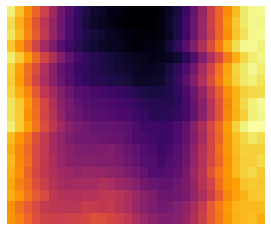

In [100]:
fig,ax = plt.subplots()
cax=ax.imshow(yz_data/amax(yz_data),cmap=colormap,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
ax.set_axis_off()
ax.set_aspect(0.025)
# savefigure('yz_data_inferno_axes_off_pt025asp.svg')

saved file to .\paper_data\yz_sim_inferno_axes_off_40asp_2206.svg


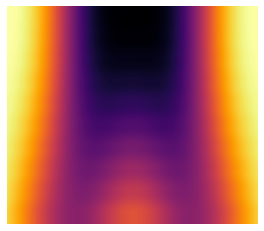

In [104]:
fig,ax = plt.subplots()
cax=ax.imshow(np.transpose(yz_sim/amax(yz_sim))[:10,270:730],cmap=colormap)#,extent=[-0.00345*15,0.00345*15,0,3.5])
# ax.set_xlabel(r'$\rho$ [mm]')
# ax.set_ylabel('z [mm]')
# cax.set_norm(colors.Normalize(vmin=0, vmax=1))
# fig.colorbar(cax)
ax.set_axis_off()
ax.set_aspect(40)
# savefigure('yz_sim_inferno_axes_off_40asp.svg')

In [70]:
yz_sim.shape

(1001, 101)

In [41]:
yz_data.shape

(19, 31)

### simulation data

In [2]:
axials = [os.path.join(imagedir,f) for f in 
          ['bright_axial_1626964002.csv','dark_axial_1626964104.csv']]

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0, t1=0, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']
['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0.7128324356402513, t1=1, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']


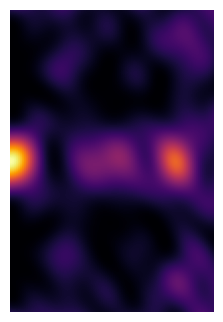

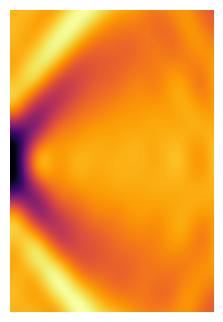

In [3]:
colormap = 'inferno'

axial_data = [soln_from_csv(t,labels=False,metastr=True,
                                  datatype=float)
               for t in axials
              ]

for datatuple,fsuffix in zip(axial_data,axials):
    data,meta = datatuple
    fig,ax = plt.subplots()
    print(meta)
#     ax.set_aspect(1.5)
    fig.dpi=100
    cax = ax.imshow(data, cmap=colormap)
#     cax.set_norm(colors.Normalize(vmin=0, vmax=1))
    ax.set_axis_off()
    ax.set_aspect(0.15)

#     savefigure(f"xyplot_cmap_{colormap}_"+fsuffix[len(imagedir)+1:]+".png")

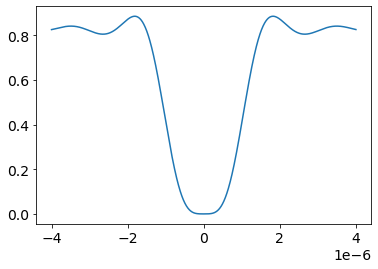

In [5]:
mag = 100
d=4e-4
datat = array(data).transpose()
plt.plot(linspace(-d/mag,d/mag,len(data)),datat[0])

In [6]:
len(data[500]),len(data)

(101, 1001)

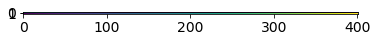

In [76]:
plt.imshow(data)

In [72]:
len(data[1])

401

In [8]:
datatuple[1]

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0.7128324356402513, t1=1, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']

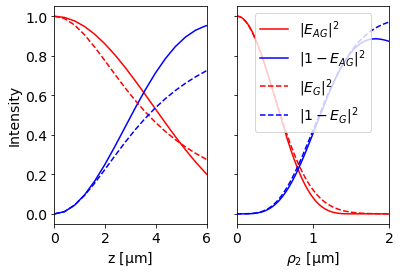

In [21]:
## comparison between data and the analytical Gaussian equivalent

# labels = ['I_{AG}','|1 - E_{AG}|^2','|E_G|^2','|1 - E_G|^2']
labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$']
colors = ['red','blue']
style = ['-','-']

mag = 100
d=4e-4

fnt = 14
fig,axes = plt.subplots(nrows=1,ncols=2,sharey=True)
ax,ax1 = axes
# plot axial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    xrow = len(data)//2
    zpts = linspace(0,6e-6,len(data[0]))/1e-6

    ax.plot(zpts,Iag_dark(zpts),label=l,color=c)#,lw=4)
    ax.plot(zpts,Iag_bright(zpts),label)
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'z [$\mathrm{\mu m}$]',fontsize=fnt)
    ax.set_ylabel('Intensity',fontsize=fnt)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((0,6))

style = ['-','-']

w0 = 0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

# axial plots of the Gaussian beams
ax.plot(zpts,e_gz(zpts/1e6)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')  
# ax.legend(loc='center right')

# plot radial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax1.plot(xpts*1e6,datat[0],label=l,color=c)#,lw=4
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax1.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=fnt)
#     ax1.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax1.set_xlim((0,2))

# radial profiles of the Gaussian beams
# w0 = (1/1.1109)*1e-6
w = lambda z: w0*(1+(z/zR)**2)**0.5
R = lambda z: z*(1+(zR/z)**2)
eta = lambda z: arctan2(z,zR)
darkI_g = lambda rho,z: (1-2*(w0/w(z))*
                         cos(eta(z) - (rho**2)*pi/(R(z)*lmbda))*
                         exp(-(rho/w(z))**2)
                         +(w0/w(z))**2*exp(-2*(rho/w(z))**2))

ax1.plot(xpts*1e6,e_g(xpts,0)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax1.plot(xpts*1e6,darkI_g(xpts,1e-7),color=colors[1],linestyle='--',label='$|1-E_G|^2$')

ax1.legend()

# for axi in axes:
# ax.set_aspect(1)

# savefigure('plt_z_rho_confinement_red_blue.svg')

C:\Users\prest\AppData\Local\Temp/ipykernel_2588/3410403728.py:113: RuntimeWarning: divide by zero encountered in true_divide
  R = lambda z: z*(1+(zR/z)**2)
C:\Users\prest\AppData\Local\Temp/ipykernel_2588/3410403728.py:113: RuntimeWarning: invalid value encountered in multiply
  R = lambda z: z*(1+(zR/z)**2)
findfont: Font family ['CambriaMath'] not found. Falling back to DejaVu Sans.


saved file to .\paper_data\plt_z_rho_confinement_bright_dark123_legended_7987.svg


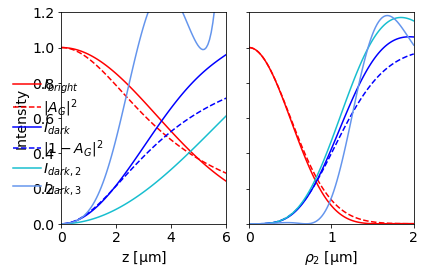

In [61]:
## comparison between A.G, expansions (incl ta=0) and the analytical Gaussian equivalents

# radial - airy-gauss expansion

# use a = w0*0.974
ibright_agr = lambda r,a: (1 - (2.10774*r**2)/a**2 + (1.99088*r**4)/a**4 - (1.12962*r**6)/a**6 + (0.436031*r**8)/a**8 - 
                           (0.122941*r**10)/a**10 + (0.0265389*r**12)/a**12 - (0.00453687*r**14)/a**14 +
                           (0.0006302*r**16)/a**16 - (0.000072589*r**18)/a**18 + (7.04871e-6*r**20)/a**20 - 
                           (5.85012e-7*r**22)/a**22 + (4.19844e-8*r**24)/a**24 - (2.63158e-9*r**26)/a**26 + 
                           (1.45318e-10*r**28)/a**28 -((7.1236e-12*r**30)/a**30) + (3.12094e-13*r**32)/a**32 - (
 1.22938e-14*r**34)/a**34 + (4.37764e-16*r**36)/a**36 - (
 1.416e-17*r**38)/a**38 + (4.17899e-19*r**40)/a**40 - (
 1.12983e-20*r**42)/a**42 + (2.80861e-22*r**44)/a**44 - (
 6.44129e-24*r**46)/a**46 + (1.36715e-25*r**48)/a**48)

# radial - dark airy-guass expansion - t_a = 0.287119

# use a = w0*1.06031 from least squares fit
idark_agr = lambda r,a: (-((1.09764e-6*r**2)/a**2)+(1.11064*r**4)/a**4-(0.92766*r**6)/a**6+
                         (0.406552*r**8)/a**8-(0.119957*r**10)/a**10+(0.0263169*r**12)/a**12-(0.00452423*r**14)/a**14+
                         (0.000629631*r**16)/a**16-(0.0000725683*r**18)/a**18+(7.04809e-6*r**20)/a**20-
                         (5.84997e-7*r**22)/a**22+(4.19841e-8*r**24)/a**24-(2.63158e-9*r**26)/a**26+
                         (1.45318e-10*r**28)/a**28)

# radial - dark airy-guass expansion - t_a = 0

# use a = w0*1.06031 from least squares fit #todo replace coefficients
# x1
idark_ag2_1r = lambda r,a: (-5.96966*10**-16+(8.88178*10**-16*r**2)/a**2+(0.389663*r**4)/a**4-(0.17371*r**6)/a**6+(0.0393068*r**8)
                         /a**8-(0.00584196*r**10)/a**10+(0.000632112*r**12)/a**12-(0.0000525959*r**14)/a**14+
                         (3.48389*10**-6*r**16)/a**16-(1.88317*10**-7*r**18)/a**18+(8.46786*10**-9*r**20)/a**20-
                            ((3.21745*10**-10*r**22)/a**22)+(1.04663*10**-11*r**24)/a**24-(2.94767*10**-13*r**26)/a**26+
                            (7.25709*10**-15*r**28)/a**28-(1.57512*10**-16*r**30)/a**30)
# x2 - this blows up. 
# idark_ag2_2r = lambda r,a: (-1.81386*10**-13-(3.63798*10**-12*r**2)/a**2+(0.881992*r**4)/a**4-(5.83686*r**6)/a**6+(14.2961*r**8)/a**8-
#                             (17.2867*r**10)/a**10+(13.0202*r**12)/a**12-(6.88739*r**14)/a**14+(2.743*r**16)/a**16-(0.860081*r**18)/a**18+
#                             (0.219033*r**20)/a**20-(0.0463591*r**22)/a**22+(0.00830172*r**24)/a**24-(0.00127595*r**26)/a**26+
#                             (0.000170322*r**28)/a**28-(0.0000199438*r**30)/a**30+(2.06614*10**-6*r**32)/a**32-(1.90788*10**-7*r**34)/a**34+
#                             (1.58058*10**-8*r**36)/a**36-(1.1816*10**-9*r**38)/a**38+(8.0124*10**-11*r**40)/a**40-(4.95122*10**-12*r**42)/a**42+
#                             (2.79997*10**-13*r**44)/a**44-(1.45464*10**-14*r**46)/a**46+(6.96693*10**-16*r**48)/a**48-(3.08613*10**-17*r**50)/a**50+
#                             (1.26814*10**-18*r**52)/a**52-(4.8472*10**-20*r**54)/a**54+(1.72782*10**-21*r**56)/a**56-(5.75734*10**-23*r**58)/a**58+
#                             (1.79731*10**-24*r**60)/a**60-(5.26752*10**-26*r**62)/a**62+(1.45216*10**-27*r**64)/a**64-(3.77259*10**-29*r**66)/a**66+
#                             (9.25192*10**-31*r**68)/a**68-(2.14534*10**-32*r**70)/a**70+(4.71083*10**-34*r**72)/a**72-(9.80993*10**-36*r**74)/a**74+
#                             (1.94*10**-37*r**76)/a**76-(3.64817*10**-39*r**78)/a**78+(6.53161*10**-41*r**80)/a**80-(1.11464*10**-42*r**82)/a**82+
#                             (1.81491*10**-44*r**84)/a**84-(2.82222*10**-46*r**86)/a**86+(4.19529*10**-48*r**88)/a**88-(5.96945*10**-50*r**90)/a**90+
#                             (8.14601*10**-52*r**92)/a**92-(1.06885*10**-53*r**94)/a**94+(1.35436*10**-55*r**96)/a**96-(1.64766*10**-57*r**98)/a**98+
#                             (2.04533*10**-59*r**100)/a**100-(1.76403*10**-61*r**102)/a**102+(5.07645*10**-63*r**104)/a**104+
#                             (8.03479*10**-65*r**106)/a**106+(3.7406*10**-66*r**108)/a**108+(8.34869*10**-68*r**110)/a**110+
#                             (1.5836*10**-69*r**112)/a**112+(1.94535*10**-71*r**114)/a**114+(1.57482*10**-73*r**116)/a**116+
#                             (6.50009*10**-76*r**118)/a**118+(9.91116*10**-79*r**120)/a**120)

# x2 - evaluated in Mathematica for a=1, from 0 to 2a, a = 1.06031 
idark_ag2_2r = [-1.81386*10**-13, 1.11386*10**-7, 1.76961*10**-6, 8.85339*10**-6,
                0.0000275202, 0.0000657613, 0.00013281, 0.000238433, 0.000392139,
                0.000602344, 0.000875551, 0.00121556, 0.00162281, 0.00209379,
                0.00262072, 0.00319138, 0.00378919, 0.00439357, 0.00498056,
                0.00552368, 0.00599507, 0.00636688, 0.00661283, 0.00670991,
                0.00664026, 0.00639302, 0.00596624, 0.00536867, 0.0046214,
                0.00375934, 0.00283239, 0.00190628, 0.00106309, 0.000401227,
                0.0000351194, 0.0000942926, 0.000722058, 0.00207371, 0.00431427,
                0.00761585, 0.0121546, 0.0181075, 0.0256486, 0.0349454, 0.0461553,
                0.0594215, 0.0748695, 0.0926037, 0.112704, 0.135224, 0.160186,
                0.187582, 0.217373, 0.249485, 0.283809, 0.320208, 0.358508, 0.39851,
                0.439984, 0.482679, 0.526321, 0.57062, 0.615272, 0.659965, 0.704385,
                0.748217, 0.791151, 0.832888, 0.873142, 0.911647, 0.948156, 0.982448,
                1.01433, 1.04364, 1.07024, 1.09403, 1.11494, 1.13294, 1.14803,
                1.16023, 1.16959, 1.17621, 1.18019, 1.18166, 1.18076, 1.17768,
                1.17259, 1.16569, 1.15716, 1.14723, 1.13608, 1.12394, 1.11099,
                1.09745, 1.0835, 1.06931, 1.05508, 1.04094, 1.02706, 1.01357]


# x3 - needs more terms? or just don't show this. it blows up a ton
# idark_ag2_3r = lambda r,a: (-1.30385*10**-11-(4.65661*10**-9*r**2)/a**2+(1.37954*r**4)/a**4-(24.4478*r**6)/a**6+
#                             (172.605*r**8)/a**8-(647.182*r**10)/a**10+(1491.54*r**12)/a**12-(2326.61*r**14)/a**14+
#                             (2635.54*r**16)/a**16-(2281.85*r**18)/a**18+(1567.87*r**20)/a**20)

# axial expansion - airy-gauss

# use a = w0*0.974
ibright_agz = lambda z,a: (1 - (2.59936*z**2)/(a**4*k**2) + (3.28402*z**4)/(a**8*k**4) - (2.43763*z**6)/(a**12*k**6) +
                         (1.18814*z**8)/(a**16*k**8) - (0.40904*z**10)/(a**20*k**10) + (0.104713*z**12)/(a**24*k**12) - 
                         (0.563738*z**14)/(a**28*k**14) + (1.17858*z**16)/(a**32*k**16) - (1.27328*z**18)/(a**36*k**18) 
                         + (0.833842*z**20)/(a**40*k**20))# - (0.365492*z**22)/(a**44*k**22) + (0.114648*z**24)/(a**48*k**24))

# axial expansion - dark airy-guass - t_a = 0.287119 #todo replace coefficients

# use a = w0*1.06031
idark_agz = lambda z,a: ((4.44257*z**2)/(a**4*k**2) - (8.03602*z**4)/(a**8*k**4) + (7.7908*z**6)/(a**12*k**6) - 
                       (4.69372*z**8)/(a**16*k**8) + (1.92573*z**10)/(a**20*k**10) + (2.17585*z**12)/(a**24*k**12) - 
                       (4.49972*z**14)/(a**28*k**14) + (4.81662*z**16)/(a**32*k**16) - (3.12978*z**18)/(a**36*k**18) + 
                       (1.36279*z**20)/(a**40*k**20))

# axial expansion - dark airy-guass - t_a = 0

# use a = w0*1.06031
# x_1 
idark_ag2_1z = lambda z,a: (2.57786*10**-13+(1.55865*z**2)/(a**4*k**2)-(0.675873*z**4)/(a**8*k**4)+(0.13703*z**6)/(a**12*k**6)-
                        (0.125686*z**8)/(a**16*k**8)+(0.0408508*z**10)/(a**20*k**10))
# x_2 use a = w0*0.732
idark_ag2_2z = lambda z,a: (-1.46264*10**-13+(3.52797*z**2)/(a**4*k**2)+(172.668*z**4)/(a**8*k**4)-(1675.18*z**6)/(a**12*k**6)+
                            (6966.75*z**8)/(a**16*k**8)-(17079.8*z**10)/(a**20*k**10)+(28083.7*z**12)/(a**24*k**12)-
                            (33347.7*z**14)/(a**28*k**14)+(30038.5*z**16)/(a**32*k**16)-(21267.7*z**18)/(a**36*k**18)+
                            (12160.4*z**20)/(a**40*k**20))
# x_3
# idark_ag2_3z = lambda z,a: (2.57786*10**-13+(1.55865*z**2)/(a**4*k**2)-(0.675873*z**4)/(a**8*k**4)+(0.13703*z**6)/(a**12*k**6)-
#                         (0.125686*z**8)/(a**16*k**8)+(0.0408508*z**10)/(a**20*k**10))

lmbda = 8.25e-7
k = 2*pi/lmbda
w0 = 1e-6
zR = pi*w0**2/lmbda
w = lambda z: w0*(1+(z/zR)**2)**0.5
R = lambda z: z*(1+(zR/z)**2)
eta = lambda z: arctan2(z,zR)
darkI_g = lambda rho,z: (1-2*(w0/w(z))*
                         cos(eta(z) - (rho**2)*pi/(R(z)*lmbda))*
                         exp(-(rho/w(z))**2)
                         +(w0/w(z))**2*exp(-2*(rho/w(z))**2))

e_g = lambda rho,z: exp(-(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2) #
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

zpts = linspace(0,6e-6,100)
xpts = linspace(0,2e-6,100)

fnt = 14
fig,axes = plt.subplots(nrows=1,ncols=2,sharey=True)
ax,ax1 = axes                           

labels = ['$I_{bright}$','$I_{dark}$','$|A_G|^2$','$|1 - A_G|^2$','$I_{dark,2}$','$I_{dark,3}$']
# labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$','$|E_G|^2$','$|1 - E_G|^2$']
# labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$']
colors = ['red','blue','tab:cyan','cornflowerblue',]
style = ['-','-']                           

# axial plots 
ax.plot(zpts*1e6,ibright_agz(zpts,w0/0.974107),label=labels[0],color=colors[0])
ax.plot(zpts*1e6,e_gz(zpts)**2,color=colors[0],linestyle='--',label=labels[2])
ax.plot(zpts*1e6,idark_agz(zpts,w0*1.06031),label=labels[1],color=colors[1])
ax.plot(zpts*1e6,darkI_g(0,zpts),color=colors[1],linestyle='--',label=labels[3])
ax.plot(zpts*1e6,idark_ag2_1z(zpts,w0*1.06031),label=labels[4],color=colors[2])
ax.plot(zpts*1e6,idark_ag2_2z(zpts,w0*1.06031),label=labels[5],color=colors[3])#,color=colors[1])

ax.set_xlabel(r'z [$\mathrm{\mu m}$]',fontsize=fnt)
ax.set_ylabel('Intensity',fontsize=fnt)
#     ax.set_ylim((0,0.005))
ax.set_xlim((0,6))

# radial plot
ax1.plot(xpts*1e6,e_g(xpts,0)**2,color=colors[0],linestyle='--')
ax1.plot(xpts*1e6,darkI_g(xpts,1e-9),color=colors[1],linestyle='--')
ax1.plot(xpts*1e6,ibright_agr(xpts,w0/0.974107),color=colors[0])
ax1.plot(xpts*1e6,idark_agr(xpts,w0*1.06031),color=colors[1])
ax1.plot(xpts*1e6,idark_ag2_1r(xpts/(0.80349*w0),1),color=colors[2])
ax1.plot(xpts*1e6,idark_ag2_2r,color=colors[3])
# ax1.plot(xpts*1e6,idark_ag2_3r(xpts,w0),color='purple')#,label=labels[1])


ax1.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=fnt)
ax1.set_xlim((0,2))
ax1.set_ylim((0,1.2))

# adjust the legend position in inkskape

# font = font_manager.FontProperties(family='CambriaMath',
#                                    style='normal', size=14)
fig.legend(loc='center left',fontsize=11,labelspacing=.1,handletextpad=0.2,frameon=False,prop=font)

fig.tight_layout(pad=1)
# for axi in axes:
# ax.set_aspect(1)

# savefigure('plt_z_rho_confinement_bright_dark123_legended.svg')

In [142]:
## same as above, but also with dark traps for t_a = 0 mask




0.9431204081825126

In [15]:
darkI_g(xpts,1e-9)

array([1.00000009, 1.0000001 , 1.00000011, ..., 1.00000011, 1.0000001 ,
       1.00000009])

In [16]:
xpts

array([-4.000e-06, -3.992e-06, -3.984e-06, ...,  3.984e-06,  3.992e-06,
        4.000e-06])

saved file to .\paper_data\plt_z_confinement_red_blue_8188.svg


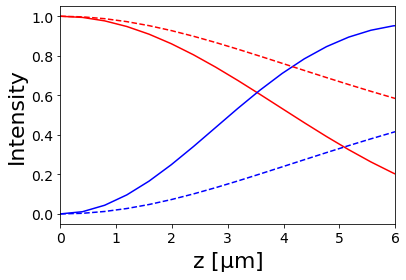

In [218]:
# labels = ['I_{AG}','|1 - E_{AG}|^2','|E_G|^2','|1 - E_G|^2']
colors = ['red','blue']
style = ['-','-']
fig,ax = plt.subplots()

# plot axial profiles compared to Gaussian-based traps
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = len(data)//2
    zpts = linspace(0,3.975155279503107e-05,len(data[0]))/1e-6

    ax.plot(zpts,data[xrow]/max(data[xrow]),label=l,color=c)#,lw=4)
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'z [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((0,6))

style = ['-','-']

w0 = 1.35e-6 #0.974e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
e_gz = lambda z: 1/sqrt(1+(z/zR)**2)

ax.plot(zpts,e_gz(zpts/1e6)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(zpts,(1 - e_gz(zpts/1e6)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')  
# ax.legend(loc='center right')
savefigure('plt_z_confinement_red_blue.svg')

saved file to .\paper_data\plt_rho_confinement_red_blue_7967.svg


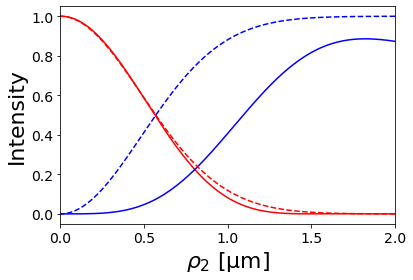

In [7]:
fig,ax = plt.subplots()
    
mag = 100
d=4e-4
    
labels = ['$|E_{AG}|^2$','$|1 - E_{AG}|^2$']#,'|E_G|^2','|1 - E_G|^2']
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax.plot(xpts*1e6,datat[0],label=l,color=c)#,lw=4
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Intensity',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((-2,2))

w0 = 1.37e-6
lmbda = 8.05e-7
zR = pi*w0**2/lmbda
e_g = lambda rho,z: exp(-2*(rho/(w0*sqrt(1+(z/zR)**2)))**2)/sqrt(1+(z/zR)**2)
    
ax.plot(xpts*1e6,e_g(xpts,0)**2,color=colors[0],linestyle='--',label='$|E_G|^2$')
ax.plot(xpts*1e6,(1 - e_g(xpts,0)**2),color=colors[1],linestyle='--',label='$|1-E_G|^2$')

# ax.plot(xpts*1e6,e_g(xpts,0)**2 - (array(axial_data[0][0]).transpose())[0],color='k',linestyle='--')
    
ax.set_xlim((0,2))
    
# ax.legend()
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.show()
savefigure('plt_rho_confinement_red_blue.svg')

saved file to .\paper_data\plt_e_fields_babinet_5383.svg


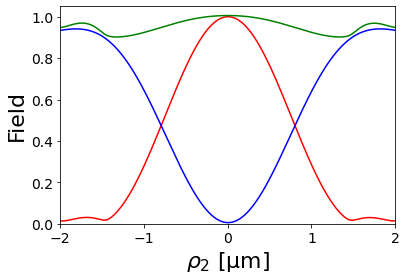

In [221]:
# verify Babinet's principle

fig,ax = plt.subplots()
    
mag = 100
d=4e-4
    
fieldsum = 0
    
for datatuple,l,c in zip(axial_data,labels,colors):
    data,meta = datatuple
    xrow = 0
    xpts = linspace(-d/mag,d/mag,len(data))
    
    datat = array(data).transpose()    
    ax.plot(xpts*1e6,datat[0]**0.5,label=l,color=c)#,lw=4
    fieldsum += datat[0]**0.5
    
#     ypts = [data[0][0]*exp(-2*x**2/(0.974)**2) for x in data[1]]
#     ax.plot(data[1],ypts,label="Gaussian", color='limegreen',lw=4)
    ax.set_xlabel(r'$\rho_2$ [$\mathrm{\mu m}$]',fontsize=22)
    ax.set_ylabel('Field',fontsize=22)
#     ax.set_ylim((0,0.005))
    ax.set_xlim((-2,2))
    ax.set_ylim((0,1.05))
    
ax.plot(xpts*1e6,fieldsum,c='green',label='$|E_{AG}|+|1 - E_{AG}|$')
savefigure('plt_e_fields_babinet.svg')

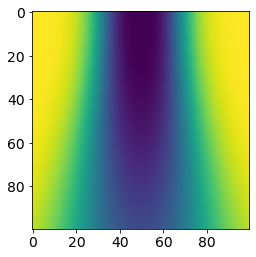

In [20]:
xarr = linspace(-2,2,100)*1e-6
zarr = linspace(0,6,100)*1e-6
xx,zz = meshgrid(xarr,zarr)
# plt.imshow(e_g(xx,zz))
plt.imshow((1-e_g(xx,zz))**2)

In [7]:
meta

['lambda=8.05e-07, f1=0.5, f2=0.005, xnum=1, ynum=1, a1=0.0001, dx=0.0004,         dy=0.0004, pts=1001, phi_std=None, pos_std=None,         r1=0, t1=0, a2=None, r2=None, zTalbotx=3.975155279503107e-05,         zTalboty=3.975155279503107e-05']

## other

In [220]:
# trap intensity for 3W 805 nm laser test on 2020.08.25
files = [os.path.join(imagedir,t) for t in ['trap_profile_data_20200825.csv','talbot_trap_profile_data_20200825.csv']]
data1,data2 = [array(soln_from_csv(f,datatype=float)) for f in files]

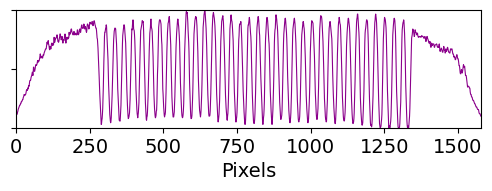

In [221]:
fig,ax = plt.subplots(dpi=100)
c1='darkmagenta' #'blueviolet'
c2='darkred'#'darkmagenta'
trim = 100
d1 = (data1/amax(data1))[trim:-trim]
d2 = (data2/amax(data2))[trim:-trim]
ax.plot(range(len(d1)),d1,linewidth=0.8,color=c1)
# ax.plot(range(len(d1)),d2,linewidth=0.8,color=c2)
# ax.set_ylabel("Intensity [arb.]")
ax.set_yticklabels([])
ax.set_xlabel("Pixels")
ax.set_xlim((0,len(d1)))
ax.set_ylim((0,1))
ax.set_aspect(400)
# savefigure(f'trap_lineprofile_{c1}_talbot.svg')

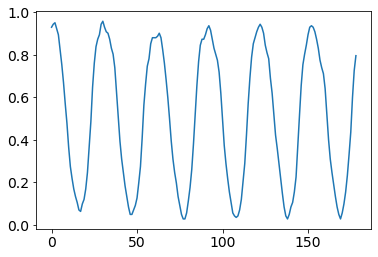

In [225]:
trim = 700
plt.plot(d1[trim:-trim])

In [149]:
savefigure(f'trap_lineprofile_{c1}_{c2}.svg')

saved file to .\paper_data\trap_lineprofile_darkmagenta_darkred_3359.svg


<Figure size 432x288 with 0 Axes>

## dark trap creation sensitivity to parameters

In [232]:
files = [os.path.join(imagedir,t) for t in [#'min_ta_28_phi_steps_0_180_25pts_b_steps_600_2500um_25pts.csv',
                                            #'min_ta_70_phi_steps_0_180_25pts_b_steps_600_2400um_25pts.csv',
                                           'ta_287119_phi_0_to_100_u_0_to_1.csv',
                                           'ta_root49_phi_0_to_100_u_0_to_1.csv']]
data1,data2 = [array(soln_from_csv(f,datatype=float,metastr=False)) for f in files]

In [233]:
# d1,meta1=data1
# d2,meta2=data2
d1 = data1
d2 = data2

saved file to .\paper_data\trap_minima_vs_phi_b_ta_49_ta_08_compare_6898.svg


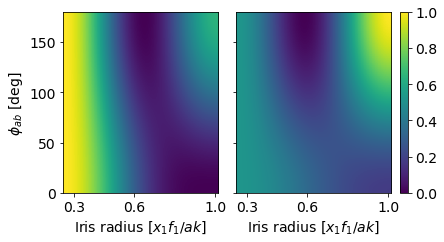

In [247]:
fig,axes = plt.subplots(nrows=1,ncols=2,sharey=True,constrained_layout=True)

f1_over_ak = 0.0006429859700912572
cmap = axes[0].imshow(d1.transpose(),origin='lower',extent=[0.6e-3/f1_over_ak/3.8317,2.5e-3/f1_over_ak/3.8317,0,180])
axes[0].set_aspect(1.8/180)
axes[0].set_xlabel('Iris radius [$x_1 f_1/a k$]')
axes[0].set_ylabel(r'$\phi_{ab}$ [deg]')
axes[0].set_aspect(1/200)
axes[0].set_xticks([0.3,0.6,1])

axes[1].imshow(d2.transpose(),origin='lower',extent=[0.6e-3/f1_over_ak/3.8317,2.5e-3/f1_over_ak/3.8317,0,180])
axes[1].set_aspect(1/200)
axes[1].set_xlabel(r'Iris radius [$x_1 f_1/a k$]')
axes[1].set_xticks([0.3,0.6,1])

ax = axes[1]
cax = ax.inset_axes([1.06, 0.0, .05, 1], transform=ax.transAxes)
fig.colorbar(cmap,cax=cax)#,ticks=[0,0.4,0.8,1.2,1.6])
# savefigure('trap_minima_vs_phi_b_ta_49_ta_08_compare.svg')

NameError: name 'b' is not defined

In [183]:
amin(d1)

4.453240767010779e-06

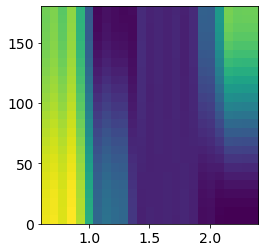

In [151]:
data,meta=data1
fig,ax = plt.subplots()
ax.imshow(data,origin='lower',extent=[0.6,2.4,0,180])
ax.set_aspect(1.8/180)

In [191]:
# evaluate this analytically
from scipy.special import jv, jn_zeros

## RIN

In [347]:
data,labels = soln_from_csv(os.path.join(imagedir,'Aerodiode 808 RIN 20220206.csv'),datatype=float,metastr=True)
data2,labels2 = soln_from_csv(os.path.join(imagedir,'20220306 825 TA RIN.csv'),datatype=float,metastr=True)

In [348]:
data = array(data).transpose()
data2 = array(data2).transpose()

In [349]:
data2.shape

(2, 6743)

In [350]:
data2

array([[-1.66237520e+01,  1.30461150e+01,  4.27159830e+01, ...,
         1.99958284e+05,  1.99987954e+05,  2.00017624e+05],
       [ 3.34521250e-02,  1.02168898e-01,  1.73659565e-01, ...,
         5.16000000e-06,  5.08000000e-06,  5.18000000e-06]])

In [351]:
xpts = data[0]
ydata = data[1:]
xpts2 = data2[0]
ydata2 = data2[1]

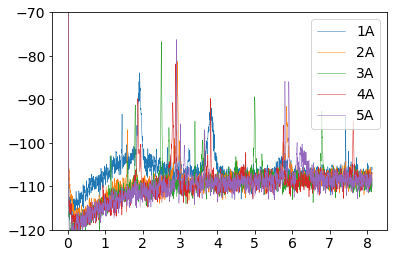

In [316]:
trim = 4000
for ypts,l in zip(ydata,labels[1:]):
    plt.plot(xpts[:-trim]/1e4,20*log10(ypts)[:-trim],linewidth=0.5,label=l)
    plt.xticks(range(9))
    plt.ylim((-120,-70))
plt.legend()

saved file to .\paper_data\808_825_RIN_compare_20220307_6947.svg


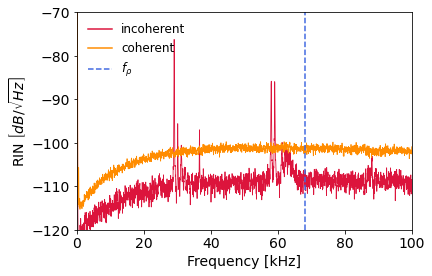

In [372]:
fig,ax = plt.subplots()
ax.plot(xpts/1e3,20*log10(ydata[-1]),linewidth=0.8,color='crimson',label='incoherent')
ax.plot(xpts2/1e3,20*log10(ydata2),linewidth=0.8,color='darkorange',label='coherent')
# plt.xticks(range(9))
ax.set_ylim((-120,-70))
ax.set_xlim()
ax.set_xlim((0,100))
ax.set_ylabel(r'RIN $\left[dB/\sqrt{Hz}\right]$')
ax.set_xlabel('Frequency [kHz]')
# plt.legend()
ax.axvline(68,linestyle='--',color='royalblue',label=r'$f_{\rho}$')
leg = ax.legend(loc='upper left',frameon=False,fontsize=12)
leg.get_lines()[0].set_linewidth(1.5)
leg.get_lines()[1].set_linewidth(1.5)

# plt.savefig(,bbox_inches='tight')
# savefigure('808_825_RIN_compare_20220307.svg')